# EE 559 - Homework 6

## Name: Aristotelis-Angelos Papadopoulos
## USC ID: 3804-2945-23

In [327]:
# Question a

import pandas as pd
from sklearn.model_selection import train_test_split

# Create a dataframe with the dataset
dataset = pd.read_csv('Frogs_MFCCs.csv', sep = ",", header = 'infer')

# Take 70% of the data for training and the rest for test
train_set, test_set = train_test_split(dataset, test_size=0.3)

**Question b -> i**

The Exact Match ratio and the Hamming loss methods for evaluating multi-label 
classification problems are well presented in the paper "A Literature Survey on Algorithms for Multi-label
Learning" by Mohammad S. Sorower which can be found [here](https://www.researchgate.net/profile/Mohammad_Sorower/publication/266888594_A_Literature_Survey_on_Algorithms_for_Multi-label_Learning/links/58d1864392851cf4f8f4b72a/A-Literature-Survey-on-Algorithms-for-Multi-label-Learning.pdf).

In [328]:
# Question b -> ii

from sklearn.svm import SVC

# As the problem suggests, we will train a classifier for each label.
# So, let us first extract the columns corresponding to these 3 labels.
family_train = train_set['Family'] # Label 1
genus_train = train_set['Genus'] # Label 2
species_train = train_set['Species'] # Label 3
features_train = train_set.iloc[:,0:22] 

family_test = test_set['Family'] # Label 1
genus_test = test_set['Genus'] # Label 2
species_test = test_set['Species'] # Label 3
features_test = test_set.iloc[:,0:22] 

In [240]:
# Question b -> ii (Continue)

# In this cell, we will train a SVM for the label "Family".
# As suggested, we will use 10-fold cross validation in order to choose the 
# best values for the parameters C and gamma. Since, I did not have a problem
# with the computational power, I created a grid of 400 points and picked
# the values that resulted in the lowest CV error.

import numpy as np
from sklearn.model_selection import StratifiedKFold

# In this list, I will save the different CV errors that I am going to compare.
ave_CV_errors = []


C_range = np.logspace(-3, 6, num=10) # C ranges from 10^-3 to 10^6 with a log increment 
gamma_range = np.linspace(0.1, 4, 40) # gamma ranges from 0.1 to 4 with linear increment


for C1 in C_range:
    for gamm in gamma_range: 
        # I will use 10-fold cross validation and I will shuffle
        # the data before each split!
        skf = StratifiedKFold(n_splits=10, shuffle=True) 
        skf.get_n_splits(features_train)
        # Initialize a list in order to get the errors from 10-fold CV
        list_10fold = []
        for train_index, test_index in skf.split(features_train,family_train):
            X_train, X_test = features_train.values[train_index], features_train.values[test_index]
            y_train, y_test = family_train.values[train_index], family_train.values[test_index]
            
            # Now, I will fit my SVM model in the k-1 folds!
            classif = SVC(C=C1, kernel='rbf', gamma=gamm, decision_function_shape='ovr')
            classif.fit(X_train, y_train)
            list_10fold.append(1 - classif.score(X_test, y_test))
        # Calculate the average error of list_10fold and save it in ave_CV_errors list
        ave_CV_errors.append(sum(list_10fold) / len(list_10fold))

# Convert the ave_CV_errors list into a numpy array
Arrray = np.asarray(ave_CV_errors)
Arrray = Arrray.reshape(10,40) # Indexes are (C, gamma)
# Take the indexes of the minimum element of the Arrray
ind = np.unravel_index(np.argmin(Arrray, axis=None), Arrray.shape)

# The list ave_CV_errors contains the average CV errors obtained by the 10 different values of C
# and the 40 different values of gamma!
# In order to pick the best values, we are going to pick the lowest value out of this list!!
print("The minimum CV error happens for : C =", C_range[ind[0]])
print("The best gamma is gamma=", gamma_range[ind[1]])
print("The CV error for those values is: ", min(ave_CV_errors))

# At this point, we have to train our model using the best values 
# calculated from the 10-fold cross validation!
classif = SVC(C=C_range[ind[0]], kernel='rbf', gamma=gamma_range[ind[1]], decision_function_shape='ovr')
classif.fit(features_train, family_train)

print("For the label 'Family', we have:","\n")
print("The accuracy of the model on the training set is: ", classif.score(features_train, family_train)*100, "%")
print("The cross-validation accuracy of the model is: ", (1 - min(ave_CV_errors))*100, "%")
# And now, we will test it on the test set
print("The test accuracy for the label 'Family' is: ", classif.score(features_test, family_test)*100, "%\n")

The minimum CV error happens for : C = 10000.0
The best gamma is gamma= 2.3
The CV error for those values is:  0.0057587362197410565
For the label 'Family', we have: 

The accuracy of the model on the training set is:  100.0 %
The cross-validation accuracy of the model is:  99.42412637802589 %
The test accuracy for the label 'Family' is:  99.21259842519686 %



In [244]:
# Question b -> ii (Continue)

# In this cell, we will train a SVM for the label "Genus".
# As suggested, we will use 10-fold cross validation in order to choose the 
# best values for the parameters C and gamma. Since, I did not have a problem
# with the computational power, I created a grid of 400 points and picked
# the values that resulted in the lowest CV error.

# In this list, I will save the different CV errors that I am going to compare.
ave_CV_errors = []


C_range = np.logspace(-3, 6, num=10) # C ranges from 10^-3 to 10^6 with a log increment 
gamma_range = np.linspace(0.1, 4, 40) # gamma ranges from 0.1 to 4 with linear increment


for C1 in C_range:
    for gamm in gamma_range: 
        # I will use 10-fold cross validation and I will shuffle
        # the data before each split!
        skf = StratifiedKFold(n_splits=10, shuffle=True) 
        skf.get_n_splits(features_train)
        # Initialize a list in order to get the errors from 10-fold CV
        list_10fold = []
        for train_index, test_index in skf.split(features_train,genus_train):
            X_train, X_test = features_train.values[train_index], features_train.values[test_index]
            y_train, y_test = genus_train.values[train_index], genus_train.values[test_index]
            
            # Now, I will fit my SVM model in the k-1 folds!
            classif = SVC(C=C1, kernel='rbf', gamma=gamm, decision_function_shape='ovr')
            classif.fit(X_train, y_train)
            list_10fold.append(1 - classif.score(X_test, y_test))
        # Calculate the average error of list_10fold and save it in ave_CV_errors list
        ave_CV_errors.append(sum(list_10fold) / len(list_10fold))

# Convert the ave_CV_errors list into a numpy array
Arrray = np.asarray(ave_CV_errors)
Arrray = Arrray.reshape(10,40) # Indexes are (C, gamma)
# Take the indexes of the minimum element of the Arrray
ind = np.unravel_index(np.argmin(Arrray, axis=None), Arrray.shape)

# The list ave_CV_errors contains the average CV errors obtained by the 10 different values of C
# and the 40 different values of gamma!
# In order to pick the best values, we are going to pick the lowest value out of this list!!
print("The minimum CV error happens for : C =", C_range[ind[0]])
print("The best gamma is gamma=", gamma_range[ind[1]])
print("The CV error for those values is: ", min(ave_CV_errors))

# At this point, we have to train our model using the best values 
# calculated from the 10-fold cross validation!
classif = SVC(C=C_range[ind[0]], kernel='rbf', gamma=gamma_range[ind[1]], decision_function_shape='ovr')
classif.fit(features_train, genus_train)


print("For the label 'Genus', we have:","\n")
print("The accuracy of the model on the training set is: ", classif.score(features_train, genus_train)*100, "%")
print("The cross-validation accuracy of the model is: ", (1 - min(ave_CV_errors))*100, "%")
# And now, we will test it on the test set
print("The test accuracy for the label 'Genus' is: ", classif.score(features_test, genus_test)*100, "%\n")

The minimum CV error happens for : C = 10000.0
The best gamma is gamma= 2.1999999999999997
The CV error for those values is:  0.008136772350812272
For the label 'Genus', we have: 

The accuracy of the model on the training set is:  100.0 %
The cross-validation accuracy of the model is:  99.18632276491877 %
The test accuracy for the label 'Genus' is:  98.98100972672533 %



In [246]:
# Question b -> ii (Continue)

# In this cell, we will train a SVM for the label "Species".
# As suggested, we will use 10-fold cross validation in order to choose the 
# best values for the parameters C and gamma. Since, I did not have a problem
# with the computational power, I created a grid of 400 points and picked
# the values that resulted in the lowest CV error.

# In this list, I will save the different CV errors that I am going to compare.
ave_CV_errors = []


C_range = np.logspace(-3, 6, num=10) # C ranges from 10^-3 to 10^6 with a log increment 
gamma_range = np.linspace(0.1, 4, 40) # gamma ranges from 0.1 to 4 with linear increment


for C1 in C_range:
    for gamm in gamma_range: 
        # I will use 10-fold cross validation and I will shuffle
        # the data before each split!
        skf = StratifiedKFold(n_splits=10, shuffle=True) 
        skf.get_n_splits(features_train)
        # Initialize a list in order to get the errors from 10-fold CV
        list_10fold = []
        for train_index, test_index in skf.split(features_train,species_train):
            X_train, X_test = features_train.values[train_index], features_train.values[test_index]
            y_train, y_test = species_train.values[train_index], species_train.values[test_index]
            
            # Now, I will fit my SVM model in the k-1 folds!
            classif = SVC(C=C1, kernel='rbf', gamma=gamm, decision_function_shape='ovr')
            classif.fit(X_train, y_train)
            list_10fold.append(1 - classif.score(X_test, y_test))
        # Calculate the average error of list_10fold and save it in ave_CV_errors list
        ave_CV_errors.append(sum(list_10fold) / len(list_10fold))

# Convert the ave_CV_errors list into a numpy array
Arrray = np.asarray(ave_CV_errors)
Arrray = Arrray.reshape(10,40) # Indexes are (C, gamma)
# Take the indexes of the minimum element of the Arrray
ind = np.unravel_index(np.argmin(Arrray, axis=None), Arrray.shape)

# The list ave_CV_errors contains the average CV errors obtained by the 10 different values of C
# and the 40 different values of gamma!
# In order to pick the best values, we are going to pick the lowest value out of this list!!
print("The minimum CV error happens for : C =", C_range[ind[0]])
print("The best gamma is gamma=", gamma_range[ind[1]])
print("The CV error for those values is: ", min(ave_CV_errors))

# At this point, we have to train our model using the best values 
# calculated from the 10-fold cross validation!
classif = SVC(C=C_range[ind[0]], kernel='rbf', gamma=gamma_range[ind[1]], decision_function_shape='ovr')
classif.fit(features_train, species_train)


print("For the label 'Species', we have:","\n")
print("The accuracy of the model on the training set is: ", classif.score(features_train, species_train)*100, "%")
print("The cross-validation accuracy of the model is: ", (1 - min(ave_CV_errors))*100, "%")
# And now, we will test it on the test set
print("The test accuracy for the label 'Species' is: ", classif.score(features_test, species_test)*100, "%\n")

The minimum CV error happens for : C = 100.0
The best gamma is gamma= 2.3
The CV error for those values is:  0.008339586823110168
For the label 'Species', we have: 

The accuracy of the model on the training set is:  100.0 %
The cross-validation accuracy of the model is:  99.16604131768898 %
The test accuracy for the label 'Species' is:  98.98100972672533 %



In [247]:
# Question b -> ii (Continue)

# Classifier for label 'Family'
classif1 = SVC(C=10000, decision_function_shape='ovr', gamma=2.3, kernel='rbf')
classif1.fit(features_train, family_train)

# Classifier for label 'Genus'
classif2 = SVC(C=10000, decision_function_shape='ovr', gamma=2.2, kernel='rbf')
classif2.fit(features_train, genus_train)

# Classifier for label 'Species'
classif3 = SVC(C=100, decision_function_shape='ovr', gamma=2.3, kernel='rbf')
classif3.fit(features_train, species_train)

# Now, I will concatenate the 3 predicted labels into 1 numpy array
y_pred = np.concatenate((np.expand_dims(classif1.predict(features_test), axis=1), 
                         np.expand_dims(classif2.predict(features_test), axis=1),
                         np.expand_dims(classif3.predict(features_test), axis=1)), axis=1)

# Now, I will convert the true labels into a numpy array
y_true = np.concatenate((np.expand_dims(np.asarray(family_test), axis=1), 
                         np.expand_dims(np.asarray(genus_test), axis=1),
                         np.expand_dims(np.asarray(species_test), axis=1)), axis=1)

# Calculate the Exact Match score and the Hamming Loss
EMscore = 0
count_Ham = 0
for i in range(0,y_true.shape[0]):
    count_EM = 0
    for j in range(0,y_true.shape[1]):
        if y_true[i][j]==y_pred[i][j]:
            count_EM += 1
        else:
            count_Ham += 1
    if count_EM==3:
        EMscore += 1
EMscore = EMscore / y_true.shape[0]
Hamming_Loss = count_Ham / (y_true.shape[0] * y_true.shape[1])
            
print("So, using Binary Relevance with SVM with Gaussian Kernel, we have:","\n")
print("The Exact Match score is:", EMscore)
print("The Hamming Loss is:", Hamming_Loss)

So, using Binary Relevance with SVM with Gaussian Kernel, we have: 

The Exact Match score is: 0.9856415006947661
The Hamming Loss is: 0.00941794040450826


In [252]:
# Question b -> iii

# In this question, we will apply the L1-penalized SVM algorithm.
# Note that we will not normalize the attributes since they were
# already normalized!

from sklearn.svm import LinearSVC

# In this cell, we will train a SVM for the label "Family".
# As suggested, we will use 10-fold cross validation in order to choose the 
# best values for the L1 regularization coefficient. 
# Since I did not have a problem with the computational power, I created a grid 
# of 100 points and picked the value that resulted in the lowest CV error.

# In this list, I will save the different CV errors that I am going to compare.
ave_CV_errors = []

C_range = np.logspace(-3, 6, num=100) # C ranges from 10^-3 to 10^6 with a log increment 

for C1 in C_range: 
    # I will use 10-fold cross validation and I will shuffle
    # the data before each split!
    skf = StratifiedKFold(n_splits=10, shuffle=True) 
    skf.get_n_splits(features_train)
    # Initialize a list in order to get the errors from 10-fold CV
    list_10fold = []
    for train_index, test_index in skf.split(features_train,family_train):
        X_train, X_test = features_train.values[train_index], features_train.values[test_index]
        y_train, y_test = family_train.values[train_index], family_train.values[test_index]
            
        # Now, I will fit my SVM model in the k-1 folds!
        classif = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, C=C1, multi_class='ovr')
        classif.fit(X_train, y_train)
        list_10fold.append(1 - classif.score(X_test, y_test))
    # Calculate the average error of list_10fold and save it in ave_CV_errors list
    ave_CV_errors.append(sum(list_10fold) / len(list_10fold))

# Convert the ave_CV_errors list into a numpy array
Arrray = np.asarray(ave_CV_errors)
Arrray = Arrray.reshape(100,1) # Indexes are (C)
# Take the index of the minimum element of the Arrray
ind = np.unravel_index(np.argmin(Arrray, axis=None), Arrray.shape)

# The list ave_CV_errors contains the average CV errors obtained by the 100 different values of C!
# In order to pick the best values, we are going to pick the lowest value out of this list!!
print("The minimum CV error happens for : C =", C_range[ind[0]])
print("The CV error for this value is: ", min(ave_CV_errors))

# At this point, we have to train our model using the best value 
# calculated from the 10-fold cross validation!
classif = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, C=C_range[ind[0]], multi_class='ovr')
classif.fit(features_train, family_train)


print("For the label 'Family', we have:","\n")
print("The accuracy of the model on the training set is: ", classif.score(features_train, family_train)*100, "%")
print("The cross-validation accuracy of the model is: ", (1 - min(ave_CV_errors))*100, "%")
# And now, we will test it on the test set
print("The test accuracy for the label 'Family' is: ", classif.score(features_test, family_test)*100, "%\n")

The minimum CV error happens for : C = 2.848035868435802
The CV error for this value is:  0.061545746729767446
For the label 'Family', we have: 

The accuracy of the model on the training set is:  93.86417791898332 %
The cross-validation accuracy of the model is:  93.84542532702326 %
The test accuracy for the label 'Family' is:  93.42288096340899 %



In [253]:
# Question b -> iii (Continue)

# In this cell, we will train a SVM for the label "Genus".
# As suggested, we will use 10-fold cross validation in order to choose the 
# best values for the L1 regularization coefficient. 
# Since I did not have a problem with the computational power, I created a grid 
# of 100 points and picked the value that resulted in the lowest CV error.

# In this list, I will save the different CV errors that I am going to compare.
ave_CV_errors = []

C_range = np.logspace(-3, 6, num=100) # C ranges from 10^-3 to 10^6 with a log increment 

for C1 in C_range: 
    # I will use 10-fold cross validation and I will shuffle
    # the data before each split!
    skf = StratifiedKFold(n_splits=10, shuffle=True) 
    skf.get_n_splits(features_train)
    # Initialize a list in order to get the errors from 10-fold CV
    list_10fold = []
    for train_index, test_index in skf.split(features_train,genus_train):
        X_train, X_test = features_train.values[train_index], features_train.values[test_index]
        y_train, y_test = genus_train.values[train_index], genus_train.values[test_index]
            
        # Now, I will fit my SVM model in the k-1 folds!
        classif = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, C=C1, multi_class='ovr')
        classif.fit(X_train, y_train)
        list_10fold.append(1 - classif.score(X_test, y_test))
    # Calculate the average error of list_10fold and save it in ave_CV_errors list
    ave_CV_errors.append(sum(list_10fold) / len(list_10fold))

# Convert the ave_CV_errors list into a numpy array
Arrray = np.asarray(ave_CV_errors)
Arrray = Arrray.reshape(100,1) # Indexes are (C)
# Take the index of the minimum element of the Arrray
ind = np.unravel_index(np.argmin(Arrray, axis=None), Arrray.shape)

# The list ave_CV_errors contains the average CV errors obtained by the 100 different values of C!
# In order to pick the best values, we are going to pick the lowest value out of this list!!
print("The minimum CV error happens for : C =", C_range[ind[0]])
print("The CV error for this value is: ", min(ave_CV_errors))

# At this point, we have to train our model using the best value 
# calculated from the 10-fold cross validation!
classif = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, C=C_range[ind[0]], multi_class='ovr')
classif.fit(features_train, genus_train)


print("For the label 'Genus', we have:","\n")
print("The accuracy of the model on the training set is: ", classif.score(features_train, genus_train)*100, "%")
print("The cross-validation accuracy of the model is: ", (1 - min(ave_CV_errors))*100, "%")
# And now, we will test it on the test set
print("The test accuracy for the label 'Genus' is: ", classif.score(features_test, genus_test)*100, "%\n")

The minimum CV error happens for : C = 18738.174228603868
The CV error for this value is:  0.04605887310243938
For the label 'Genus', we have: 

The accuracy of the model on the training set is:  95.59173947577443 %
The cross-validation accuracy of the model is:  95.39411268975606 %
The test accuracy for the label 'Genus' is:  95.83140342751274 %



In [254]:
# Question b -> iii (Continue)

# In this cell, we will train a SVM for the label "Species".
# As suggested, we will use 10-fold cross validation in order to choose the 
# best values for the L1 regularization coefficient. 
# Since I did not have a problem with the computational power, I created a grid 
# of 100 points and picked the value that resulted in the lowest CV error.

# In this list, I will save the different CV errors that I am going to compare.
ave_CV_errors = []

C_range = np.logspace(-3, 6, num=100) # C ranges from 10^-3 to 10^6 with a log increment 

for C1 in C_range: 
    # I will use 10-fold cross validation and I will shuffle
    # the data before each split!
    skf = StratifiedKFold(n_splits=10, shuffle=True) 
    skf.get_n_splits(features_train)
    # Initialize a list in order to get the errors from 10-fold CV
    list_10fold = []
    for train_index, test_index in skf.split(features_train,species_train):
        X_train, X_test = features_train.values[train_index], features_train.values[test_index]
        y_train, y_test = species_train.values[train_index], species_train.values[test_index]
            
        # Now, I will fit my SVM model in the k-1 folds!
        classif = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, C=C1, multi_class='ovr')
        classif.fit(X_train, y_train)
        list_10fold.append(1 - classif.score(X_test, y_test))
    # Calculate the average error of list_10fold and save it in ave_CV_errors list
    ave_CV_errors.append(sum(list_10fold) / len(list_10fold))

# Convert the ave_CV_errors list into a numpy array
Arrray = np.asarray(ave_CV_errors)
Arrray = Arrray.reshape(100,1) # Indexes are (C)
# Take the index of the minimum element of the Arrray
ind = np.unravel_index(np.argmin(Arrray, axis=None), Arrray.shape)

# The list ave_CV_errors contains the average CV errors obtained by the 100 different values of C!
# In order to pick the best values, we are going to pick the lowest value out of this list!!
print("The minimum CV error happens for : C =", C_range[ind[0]])
print("The CV error for this value is: ", min(ave_CV_errors))

# At this point, we have to train our model using the best value 
# calculated from the 10-fold cross validation!
classif = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, C=C_range[ind[0]], multi_class='ovr')
classif.fit(features_train, species_train)


print("For the label 'Species', we have:","\n")
print("The accuracy of the model on the training set is: ", classif.score(features_train, species_train)*100, "%")
print("The cross-validation accuracy of the model is: ", (1 - min(ave_CV_errors))*100, "%")
# And now, we will test it on the test set
print("The test accuracy for the label 'Species' is: ", classif.score(features_test, species_test)*100, "%\n")

The minimum CV error happens for : C = 1519.9110829529332
The CV error for this value is:  0.03931985181947569
For the label 'Species', we have: 

The accuracy of the model on the training set is:  96.44559173947577 %
The cross-validation accuracy of the model is:  96.06801481805243 %
The test accuracy for the label 'Species' is:  96.34089856415007 %



In [362]:
# Question b -> iii (Continue)

# Classifier for label 'Family'
classif4 = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, C=2.848, multi_class='ovr')
classif4.fit(features_train, family_train)

# Classifier for label 'Genus'
classif5 = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, C=18738.2, multi_class='ovr')
classif5.fit(features_train, genus_train)

# Classifier for label 'Species'
classif6 = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, C=1519.9, multi_class='ovr')
classif6.fit(features_train, species_train)

# Now, I will concatenate the 3 predicted labels into 1 numpy array
y_pred2 = np.concatenate((np.expand_dims(classif4.predict(features_test), axis=1), 
                         np.expand_dims(classif5.predict(features_test), axis=1),
                         np.expand_dims(classif6.predict(features_test), axis=1)), axis=1)

# Now, I will convert the true labels into a numpy array
y_true = np.concatenate((np.expand_dims(np.asarray(family_test), axis=1), 
                         np.expand_dims(np.asarray(genus_test), axis=1),
                         np.expand_dims(np.asarray(species_test), axis=1)), axis=1)

# Calculate the Exact Match score and the Hamming Loss
EMscore = 0
count_Ham = 0
for i in range(0,y_true.shape[0]):
    count_EM = 0
    for j in range(0,y_true.shape[1]):
        if y_true[i][j]==y_pred2[i][j]:
            count_EM += 1
        else:
            count_Ham += 1
    if count_EM==3:
        EMscore += 1
EMscore = EMscore / y_true.shape[0]
Hamming_Loss = count_Ham / (y_true.shape[0] * y_true.shape[1])
            
print("So, using Binary Relevance with L1-penalized SVM, we have:","\n")
print("The Exact Match score is:", EMscore)
print("The Hamming Loss is:", Hamming_Loss)

So, using Binary Relevance with L1-penalized SVM, we have: 

The Exact Match score is: 0.920796665122742
The Hamming Loss is: 0.04878801914466574


In [451]:
# Question b -> iv

# In this question, we are asked to use SMOTE in order to remedy
# the class imbalance appearing in the dataset.

from imblearn.over_sampling import SMOTE

# In this question, we will apply the L1-penalized SVM algorithm.
# Note that we will not normalize the attributes since they were
# already normalized!

# In this cell, we will train a SVM for the label "Family".
# As suggested, we will use 10-fold cross validation in order to choose the 
# best values for the L1 regularization coefficient. 
# Since I did not have a problem with the computational power, I created a grid 
# of 100 points and picked the value that resulted in the lowest CV error.

# In this list, I will save the different CV errors that I am going to compare.
ave_CV_errors = []

C_range = np.logspace(-3, 6, num=100) # C ranges from 10^-3 to 10^6 with a log increment 

for C1 in C_range: 
    # I will use 10-fold cross validation and I will shuffle
    # the data before each split!
    skf = StratifiedKFold(n_splits=10, shuffle=True) 
    skf.get_n_splits(features_train)
    # Initialize a list in order to get the errors from 10-fold CV
    list_10fold = []
    for train_index, test_index in skf.split(features_train,family_train):
        X_train, X_test = features_train.values[train_index], features_train.values[test_index]
        y_train, y_test = family_train.values[train_index], family_train.values[test_index]
        
        # Use SMOTE on the training data
        sm = SMOTE(random_state=12, ratio = 'all')
        X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
            
        # Now, I will fit my SVM model in the k-1 folds!
        classif = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, C=C1, multi_class='ovr')
        classif.fit(X_train_res, y_train_res)
        list_10fold.append(1 - classif.score(X_test, y_test))
    # Calculate the average error of list_10fold and save it in ave_CV_errors list
    ave_CV_errors.append(sum(list_10fold) / len(list_10fold))

# Convert the ave_CV_errors list into a numpy array
Arrray = np.asarray(ave_CV_errors)
Arrray = Arrray.reshape(100,1) # Indexes are (C)
# Take the index of the minimum element of the Arrray
ind = np.unravel_index(np.argmin(Arrray, axis=None), Arrray.shape)

# The list ave_CV_errors contains the average CV errors obtained by the 100 different values of C!
# In order to pick the best values, we are going to pick the lowest value out of this list!!
print("The minimum CV error happens for : C =", C_range[ind[0]])
print("The CV error for this value is: ", min(ave_CV_errors))

# At this point, we have to train our model using the best value 
# calculated from the 10-fold cross validation!
classif = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, C=C_range[ind[0]], multi_class='ovr')
classif.fit(features_train, family_train)


print("For the label 'Family' using SMOTE, we have:","\n")
print("The accuracy of the model on the training set is: ", classif.score(features_train, family_train)*100, "%")
print("The cross-validation accuracy of the model is: ", (1 - min(ave_CV_errors))*100, "%")
# And now, we will test it on the test set
print("The test accuracy for the label 'Family' is: ", classif.score(features_test, family_test)*100, "%\n")

The minimum CV error happens for : C = 187.3817422860383
The CV error for this value is:  0.07982830074557529
For the label 'Family' using SMOTE, we have: 

The accuracy of the model on the training set is:  93.76489277204129 %
The cross-validation accuracy of the model is:  92.01716992544246 %
The test accuracy for the label 'Family' is:  94.39555349698935 %



In [452]:
# Question b -> iv (Continue)

# In this question, we are asked to use SMOTE in order to remedy
# the class imbalance appearing in the dataset.

# In this cell, we will train a SVM for the label "Genus".
# As suggested, we will use 10-fold cross validation in order to choose the 
# best values for the L1 regularization coefficient. 
# Since I did not have a problem with the computational power, I created a grid 
# of 100 points and picked the value that resulted in the lowest CV error.

# In this list, I will save the different CV errors that I am going to compare.
ave_CV_errors = []

C_range = np.logspace(-3, 6, num=100) # C ranges from 10^-3 to 10^6 with a log increment 

for C1 in C_range: 
    # I will use 10-fold cross validation and I will shuffle
    # the data before each split!
    skf = StratifiedKFold(n_splits=10, shuffle=True) 
    skf.get_n_splits(features_train)
    # Initialize a list in order to get the errors from 10-fold CV
    list_10fold = []
    for train_index, test_index in skf.split(features_train,genus_train):
        X_train, X_test = features_train.values[train_index], features_train.values[test_index]
        y_train, y_test = genus_train.values[train_index], genus_train.values[test_index]
        
        # Use SMOTE on the training data
        sm = SMOTE(random_state=12, ratio = 'all')
        X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
            
        # Now, I will fit my SVM model in the k-1 folds!
        classif = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, C=C1, multi_class='ovr')
        classif.fit(X_train_res, y_train_res)
        list_10fold.append(1 - classif.score(X_test, y_test))
    # Calculate the average error of list_10fold and save it in ave_CV_errors list
    ave_CV_errors.append(sum(list_10fold) / len(list_10fold))

# Convert the ave_CV_errors list into a numpy array
Arrray = np.asarray(ave_CV_errors)
Arrray = Arrray.reshape(100,1) # Indexes are (C)
# Take the index of the minimum element of the Arrray
ind = np.unravel_index(np.argmin(Arrray, axis=None), Arrray.shape)

# The list ave_CV_errors contains the average CV errors obtained by the 100 different values of C!
# In order to pick the best values, we are going to pick the lowest value out of this list!!
print("The minimum CV error happens for : C =", C_range[ind[0]])
print("The CV error for this value is: ", min(ave_CV_errors))

# At this point, we have to train our model using the best value 
# calculated from the 10-fold cross validation!
classif = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, C=C_range[ind[0]], multi_class='ovr')
classif.fit(features_train, genus_train)


print("For the label 'Genus' using SMOTE, we have:","\n")
print("The accuracy of the model on the training set is: ", classif.score(features_train, genus_train)*100, "%")
print("The cross-validation accuracy of the model is: ", (1 - min(ave_CV_errors))*100, "%")
# And now, we will test it on the test set
print("The test accuracy for the label 'Genus' is: ", classif.score(features_test, genus_test)*100, "%\n")

The minimum CV error happens for : C = 0.8111308307896873
The CV error for this value is:  0.08638495587930614
For the label 'Genus' using SMOTE, we have: 

The accuracy of the model on the training set is:  94.2613185067514 %
The cross-validation accuracy of the model is:  91.36150441206938 %
The test accuracy for the label 'Genus' is:  94.16396479851782 %



In [453]:
# Question b -> iv (Continue)

# In this question, we are asked to use SMOTE in order to remedy
# the class imbalance appearing in the dataset.

# In this cell, we will train a SVM for the label "Species".
# As suggested, we will use 10-fold cross validation in order to choose the 
# best values for the L1 regularization coefficient. 
# Since I did not have a problem with the computational power, I created a grid 
# of 100 points and picked the value that resulted in the lowest CV error.

# In this list, I will save the different CV errors that I am going to compare.
ave_CV_errors = []

C_range = np.logspace(-3, 6, num=100) # C ranges from 10^-3 to 10^6 with a log increment 

for C1 in C_range: 
    # I will use 10-fold cross validation and I will shuffle
    # the data before each split!
    skf = StratifiedKFold(n_splits=10, shuffle=True) 
    skf.get_n_splits(features_train)
    # Initialize a list in order to get the errors from 10-fold CV
    list_10fold = []
    for train_index, test_index in skf.split(features_train,species_train):
        X_train, X_test = features_train.values[train_index], features_train.values[test_index]
        y_train, y_test = species_train.values[train_index], species_train.values[test_index]
        
        # Use SMOTE on the training data
        sm = SMOTE(random_state=12, ratio = 'all')
        X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
            
        # Now, I will fit my SVM model in the k-1 folds!
        classif = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, C=C1, multi_class='ovr')
        classif.fit(X_train_res, y_train_res)
        list_10fold.append(1 - classif.score(X_test, y_test))
    # Calculate the average error of list_10fold and save it in ave_CV_errors list
    ave_CV_errors.append(sum(list_10fold) / len(list_10fold))

# Convert the ave_CV_errors list into a numpy array
Arrray = np.asarray(ave_CV_errors)
Arrray = Arrray.reshape(100,1) # Indexes are (C)
# Take the index of the minimum element of the Arrray
ind = np.unravel_index(np.argmin(Arrray, axis=None), Arrray.shape)

# The list ave_CV_errors contains the average CV errors obtained by the 100 different values of C!
# In order to pick the best values, we are going to pick the lowest value out of this list!!
print("The minimum CV error happens for : C =", C_range[ind[0]])
print("The CV error for this value is: ", min(ave_CV_errors))

# At this point, we have to train our model using the best value 
# calculated from the 10-fold cross validation!
classif = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, C=C_range[ind[0]], multi_class='ovr')
classif.fit(features_train, species_train)


print("For the label 'Species' using SMOTE, we have:","\n")
print("The accuracy of the model on the training set is: ", classif.score(features_train, species_train)*100, "%")
print("The cross-validation accuracy of the model is: ", (1 - min(ave_CV_errors))*100, "%")
# And now, we will test it on the test set
print("The test accuracy for the label 'Species' is: ", classif.score(features_test, species_test)*100, "%\n")

The minimum CV error happens for : C = 10.0
The CV error for this value is:  0.042500546748747633
For the label 'Species' using SMOTE, we have: 

The accuracy of the model on the training set is:  96.38602065131056 %
The cross-validation accuracy of the model is:  95.74994532512524 %
The test accuracy for the label 'Species' is:  95.69245020842982 %



In [454]:
# Question b -> iv (Continue)

# Use SMOTE
X_train_res7, y_train_res7 = sm.fit_sample(features_train, family_train)

# Classifier for label 'Family'
classif7 = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, C=187.4, multi_class='ovr')
classif7.fit(X_train_res7, y_train_res7)

# Use SMOTE
X_train_res8, y_train_res8 = sm.fit_sample(features_train, genus_train)

# Classifier for label 'Genus'
classif8 = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, C=0.81, multi_class='ovr')
classif8.fit(X_train_res8, y_train_res8)

# Use SMOTE
X_train_res9, y_train_res9 = sm.fit_sample(features_train, species_train)

# Classifier for label 'Species'
classif9 = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, C=10, multi_class='ovr')
classif9.fit(X_train_res9, y_train_res9)

# Now, I will concatenate the 3 predicted labels into 1 numpy array
y_pred3 = np.concatenate((np.expand_dims(classif7.predict(features_test), axis=1), 
                         np.expand_dims(classif8.predict(features_test), axis=1),
                         np.expand_dims(classif9.predict(features_test), axis=1)), axis=1)

# Now, I will convert the true labels into a numpy array
y_true = np.concatenate((np.expand_dims(np.asarray(family_test), axis=1), 
                         np.expand_dims(np.asarray(genus_test), axis=1),
                         np.expand_dims(np.asarray(species_test), axis=1)), axis=1)

# Calculate the Exact Match score and the Hamming Loss
EMscore = 0
count_Ham = 0
for i in range(0,y_true.shape[0]):
    count_EM = 0
    for j in range(0,y_true.shape[1]):
        if y_true[i][j]==y_pred3[i][j]:
            count_EM += 1
        else:
            count_Ham += 1
    if count_EM==3:
        EMscore += 1
EMscore = EMscore / y_true.shape[0]
Hamming_Loss = count_Ham / (y_true.shape[0] * y_true.shape[1])
            
print("So, using Binary Relevance with L1-penalized SVM and the SMOTE technique on the training dataset, we have:","\n")
print("The Exact Match score is:", EMscore)
print("The Hamming Loss is:", Hamming_Loss)

So, using Binary Relevance with L1-penalized SVM and the SMOTE technique on the training dataset, we have: 

The Exact Match score is: 0.8508568781843446
The Hamming Loss is: 0.07271885132005558


### Conclusions for Binary Relevance

<table> 
    <tr>
        <td>
        **Classification Methods**
        </td>
        <td>
        **Exact Match score**
        </td>
        <td>
        **Hamming Loss**
        </td>

    </tr>
        <td>
        SVM with <br />
        Gaussian kernel
        </td>
        <td>
        0.985
        </td>
        <td>
        0.0094
        </td>
    <tr>
    </tr>
        <td>
        SVM with <br />
        L1 regularization
        </td>
        <td>
        0.92
        </td>
        <td>
        0.048
        </td>
    <tr>
        <td>
        SVM with <br />
        L1 regularization <br />
        and SMOTE
        </td>
        <td>
        0.85
        </td>
        <td>
        0.0727
        </td>
    </tr>
</table> 

As it can be observed from the above table, the SVM with Gaussian kernel algorithm achieves the highest Exact Match score and the lowest Hamming Loss compared to the other two algorithms. This is happening since this algorithm creates nonlinear decision boundaries among the classes and the data are not fully linearly separable.

However, it should be noted that the other two algorithms achieved good scores too even though the SMOTE approach required a lot of computational power in order to apply the 10-fold CV approach for 100 values of the regularization parameter C. 

## Classifier Chain method


In [352]:
# Question b -> v

# At first, we have to train our algorithm for the 1st label, let's 
# say "Family" as we also did in the Binary Relevance case!

# In this cell, we will train a SVM for the label "Family".
# As suggested, we will use 10-fold cross validation in order to choose the 
# best values for the parameters C and gamma. Since, I did not have a problem
# with the computational power, I created a grid of 400 points and picked
# the values that resulted in the lowest CV error.

# In this list, I will save the different CV errors that I am going to compare.
ave_CV_errors = []


C_range = np.logspace(-3, 6, num=10) # C ranges from 10^-3 to 10^6 with a log increment 
gamma_range = np.linspace(0.1, 4, 40) # gamma ranges from 0.1 to 4 with linear increment


for C1 in C_range:
    for gamm in gamma_range: 
        # I will use 10-fold cross validation and I will shuffle
        # the data before each split!
        skf = StratifiedKFold(n_splits=10, shuffle=True) 
        skf.get_n_splits(features_train)
        # Initialize a list in order to get the errors from 10-fold CV
        list_10fold = []
        for train_index, test_index in skf.split(features_train,family_train):
            X_train, X_test = features_train.values[train_index], features_train.values[test_index]
            y_train, y_test = family_train.values[train_index], family_train.values[test_index]
            
            # Now, I will fit my SVM model in the k-1 folds!
            classif = SVC(C=C1, kernel='rbf', gamma=gamm, decision_function_shape='ovr')
            classif.fit(X_train, y_train)
            list_10fold.append(1 - classif.score(X_test, y_test))
        # Calculate the average error of list_10fold and save it in ave_CV_errors list
        ave_CV_errors.append(sum(list_10fold) / len(list_10fold))

# Convert the ave_CV_errors list into a numpy array
Arrray = np.asarray(ave_CV_errors)
Arrray = Arrray.reshape(10,40) # Indexes are (C, gamma)
# Take the indexes of the minimum element of the Arrray
ind = np.unravel_index(np.argmin(Arrray, axis=None), Arrray.shape)

# The list ave_CV_errors contains the average CV errors obtained by the 10 different values of C
# and the 40 different values of gamma!
# In order to pick the best values, we are going to pick the lowest value out of this list!!
print("The minimum CV error happens for : C =", C_range[ind[0]])
print("The best gamma is gamma=", gamma_range[ind[1]])
print("The CV error for those values is: ", min(ave_CV_errors))

# At this point, we have to train our model using the best values 
# calculated from the 10-fold cross validation!
classif = SVC(C=C_range[ind[0]], kernel='rbf', gamma=gamma_range[ind[1]], decision_function_shape='ovr')
classif.fit(features_train, family_train)

print("For the label 'Family', we have:","\n")
print("The accuracy of the model on the training set is: ", classif.score(features_train, family_train)*100, "%")
print("The cross-validation accuracy of the model is: ", (1 - min(ave_CV_errors))*100, "%")
# And now, we will test it on the test set
print("The test accuracy for the label 'Family' is: ", classif.score(features_test, family_test)*100, "%\n")

The minimum CV error happens for : C = 1000.0
The best gamma is gamma= 2.5
The CV error for those values is:  0.006553543766363435
For the label 'Family', we have: 

The accuracy of the model on the training set is:  100.0 %
The cross-validation accuracy of the model is:  99.34464562336366 %
The test accuracy for the label 'Family' is:  99.39786938397405 %



In [353]:
# Question b -> v (Continue)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Since the method "fit" cannot handle strings I will rename my classes.
le.fit(family_train)
family_train1 = le.transform(family_train)

# Now, I have to add the label for Family as a 
# new column (feature) in my dataset and train the next classifier
# for this augmented set of features!
features_train1 = np.concatenate((features_train, 
                      np.expand_dims(family_train1, axis=1)), axis=1)
#Convert it into a dataframe
features_train_augment_1 = pd.DataFrame(data=features_train1,index=None,columns=None)

# Now, I have to train the next classifier for the 
# augmented set of features!

# We will train a SVM for the label "Genus".
# As suggested, we will use 10-fold cross validation in order to choose the 
# best values for the parameters C and gamma. Since, I did not have a problem
# with the computational power, I created a grid of 400 points and picked
# the values that resulted in the lowest CV error.

# In this list, I will save the different CV errors that I am going to compare.
ave_CV_errors = []


C_range = np.logspace(-3, 6, num=10) # C ranges from 10^-3 to 10^6 with a log increment 
gamma_range = np.linspace(0.1, 4, 40) # gamma ranges from 0.1 to 4 with linear increment


for C1 in C_range:
    for gamm in gamma_range: 
        # I will use 10-fold cross validation and I will shuffle
        # the data before each split!
        skf = StratifiedKFold(n_splits=10, shuffle=True) 
        skf.get_n_splits(features_train_augment_1)
        # Initialize a list in order to get the errors from 10-fold CV
        list_10fold = []
        for train_index, test_index in skf.split(features_train_augment_1,genus_train):
            X_train, X_test = features_train_augment_1.values[train_index], features_train_augment_1.values[test_index]
            y_train, y_test = genus_train.values[train_index], genus_train.values[test_index]
            
            # Now, I will fit my SVM model in the k-1 folds!
            classif = SVC(C=C1, kernel='rbf', gamma=gamm, decision_function_shape='ovr')
            classif.fit(X_train, y_train)
            list_10fold.append(1 - classif.score(X_test, y_test))
        # Calculate the average error of list_10fold and save it in ave_CV_errors list
        ave_CV_errors.append(sum(list_10fold) / len(list_10fold))

# Convert the ave_CV_errors list into a numpy array
Arrray = np.asarray(ave_CV_errors)
Arrray = Arrray.reshape(10,40) # Indexes are (C, gamma)
# Take the indexes of the minimum element of the Arrray
ind = np.unravel_index(np.argmin(Arrray, axis=None), Arrray.shape)

# The list ave_CV_errors contains the average CV errors obtained by the 10 different values of C
# and the 40 different values of gamma!
# In order to pick the best values, we are going to pick the lowest value out of this list!!
print("The minimum CV error happens for : C =", C_range[ind[0]])
print("The best gamma is gamma=", gamma_range[ind[1]])
print("The CV error for those values is: ", min(ave_CV_errors))

# At this point, we have to train our model using the best values 
# calculated from the 10-fold cross validation!
classif = SVC(C=C_range[ind[0]], kernel='rbf', gamma=gamma_range[ind[1]], decision_function_shape='ovr')
classif.fit(features_train_augment_1, genus_train)

print("For the label 'Genus', we have:","\n")
print("The accuracy of the model on the training set is: ", classif.score(features_train_augment_1, genus_train)*100, "%")
print("The cross-validation accuracy of the model is: ", (1 - min(ave_CV_errors))*100, "%")

The minimum CV error happens for : C = 1000000.0
The best gamma is gamma= 0.8999999999999999
The CV error for those values is:  0.003373117840297446
For the label 'Genus', we have: 

The accuracy of the model on the training set is:  100.0 %
The cross-validation accuracy of the model is:  99.66268821597025 %


In [354]:
# Question b -> v (Continue)

# Since the method "fit" cannot handle strings I will rename my classes.
le.fit(genus_train)
genus_train1 = le.transform(genus_train)

# Now, I have to add the label for Genus as a 
# new column (feature) in my already augmented dataset 
# and train the next classifier for this augmented set of features!
features_train2 = np.concatenate((features_train1, 
                      np.expand_dims(genus_train1, axis=1)), axis=1)
#Convert it into a dataframe
features_train_augment_2 = pd.DataFrame(data=features_train2,index=None,columns=None)

# Now, I have to train the next classifier for the 
# augmented set of features!

# We will train a SVM for the label "Species".
# As suggested, we will use 10-fold cross validation in order to choose the 
# best values for the parameters C and gamma. Since, I did not have a problem
# with the computational power, I created a grid of 400 points and picked
# the values that resulted in the lowest CV error.

# In this list, I will save the different CV errors that I am going to compare.
ave_CV_errors = []


C_range = np.logspace(-3, 6, num=10) # C ranges from 10^-3 to 10^6 with a log increment 
gamma_range = np.linspace(0.1, 4, 40) # gamma ranges from 0.1 to 4 with linear increment


for C1 in C_range:
    for gamm in gamma_range: 
        # I will use 10-fold cross validation and I will shuffle
        # the data before each split!
        skf = StratifiedKFold(n_splits=10, shuffle=True) 
        skf.get_n_splits(features_train_augment_2)
        # Initialize a list in order to get the errors from 10-fold CV
        list_10fold = []
        for train_index, test_index in skf.split(features_train_augment_2,species_train):
            X_train, X_test = features_train_augment_2.values[train_index], features_train_augment_2.values[test_index]
            y_train, y_test = species_train.values[train_index], species_train.values[test_index]
            
            # Now, I will fit my SVM model in the k-1 folds!
            classif = SVC(C=C1, kernel='rbf', gamma=gamm, decision_function_shape='ovr')
            classif.fit(X_train, y_train)
            list_10fold.append(1 - classif.score(X_test, y_test))
        # Calculate the average error of list_10fold and save it in ave_CV_errors list
        ave_CV_errors.append(sum(list_10fold) / len(list_10fold))

# Convert the ave_CV_errors list into a numpy array
Arrray = np.asarray(ave_CV_errors)
Arrray = Arrray.reshape(10,40) # Indexes are (C, gamma)
# Take the indexes of the minimum element of the Arrray
ind = np.unravel_index(np.argmin(Arrray, axis=None), Arrray.shape)

# The list ave_CV_errors contains the average CV errors obtained by the 10 different values of C
# and the 40 different values of gamma!
# In order to pick the best values, we are going to pick the lowest value out of this list!!
print("The minimum CV error happens for : C =", C_range[ind[0]])
print("The best gamma is gamma=", gamma_range[ind[1]])
print("The CV error for those values is: ", min(ave_CV_errors))

# At this point, we have to train our model using the best values 
# calculated from the 10-fold cross validation!
classif = SVC(C=C_range[ind[0]], kernel='rbf', gamma=gamma_range[ind[1]], decision_function_shape='ovr')
classif.fit(features_train_augment_2, species_train)

print("For the label 'Species', we have:","\n")
print("The accuracy of the model on the training set is: ", classif.score(features_train_augment_2, species_train)*100, "%")
print("The cross-validation accuracy of the model is: ", (1 - min(ave_CV_errors))*100, "%")

The minimum CV error happens for : C = 100.0
The best gamma is gamma= 0.5
The CV error for those values is:  0.0007877944257230762
For the label 'Species', we have: 

The accuracy of the model on the training set is:  100.0 %
The cross-validation accuracy of the model is:  99.92122055742769 %


In [393]:
# Question b -> v (Continue)

# Classifier for label 'Family'
classif10 = SVC(C=1000, decision_function_shape='ovr', gamma=2.5, kernel='rbf')
classif10.fit(features_train, family_train)
y1_pred = classif10.predict(features_test)

# Now, I have to augment my features test dataset
# with the predicted "Family" label from the first classifier
# and let my second classifier predict the label "Genus" by
# providing him the augmented set of features.

# Since I changed the name before, I have to do it also for the test set.
le.fit(y1_pred)
y1_pred = le.transform(y1_pred)
        
features_test1 = np.concatenate((features_test, np.expand_dims(y1_pred, axis=1)), axis=1)
#Convert it into a dataframe
features_test_augment_1 = pd.DataFrame(data=features_test1,index=None,columns=None)
        

# Classifier for label 'Genus'
classif11 = SVC(C=1000000, decision_function_shape='ovr', gamma=0.9, kernel='rbf')
classif11.fit(features_train_augment_1, genus_train)
y2_pred = classif11.predict(features_test_augment_1)
                                       
# Now, I have to augment my already augmented features test dataset
# with the predicted "Genus" label from the second classifier
# and let my third classifier predict the label "Species" by
# providing him the augmented set of features.

# Since I changed the name before, I have to do it also for the test set.
le.fit(y2_pred)
y2_pred = le.transform(y2_pred)
        
features_test2 = np.concatenate((features_test1, np.expand_dims(y2_pred, axis=1)), axis=1)
#Convert it into a dataframe
features_test_augment_2 = pd.DataFrame(data=features_test2,index=None,columns=None)

# Classifier for label 'Species'
classif12 = SVC(C=100, decision_function_shape='ovr', gamma=0.5, kernel='rbf')
classif12.fit(features_train_augment_2, species_train)

# Now, I will concatenate the 3 predicted labels into 1 numpy array
y_pred4 = np.concatenate((np.expand_dims(classif10.predict(features_test), axis=1), 
                         np.expand_dims(classif11.predict(features_test_augment_1), axis=1),
                         np.expand_dims(classif12.predict(features_test_augment_2), axis=1)), axis=1)

# Now, I will convert the true labels into a numpy array
y_true = np.concatenate((np.expand_dims(np.asarray(family_test), axis=1), 
                         np.expand_dims(np.asarray(genus_test), axis=1),
                         np.expand_dims(np.asarray(species_test), axis=1)), axis=1)

# Calculate the Exact Match score and the Hamming Loss
EMscore = 0
count_Ham = 0
for i in range(0,y_true.shape[0]):
    count_EM = 0
    for j in range(0,y_true.shape[1]):
        if y_true[i][j]==y_pred4[i][j]:
            count_EM += 1
        else:
            count_Ham += 1
    if count_EM==3:
        EMscore += 1
EMscore = EMscore / y_true.shape[0]
Hamming_Loss = count_Ham / (y_true.shape[0] * y_true.shape[1])
            
print("So, using Classifier Chain method with SVM with Gaussian Kernel, we have:","\n")
print("The Exact Match score is:", EMscore)
print("The Hamming Loss is:", Hamming_Loss)

So, using Classifier Chain method with SVM with Gaussian Kernel, we have: 

The Exact Match score is: 0.9911996294580825
The Hamming Loss is: 0.00725644588544079


***Note***: I implemented the Classifier Chain method only for the SVM with Gaussian kernel algorithm since this was the algorithm that had the best scores in the previous question! Similarily, I could have done it for the other algorithms too (L1 penalized SVC and L1 penalized SVC with SMOTE) but it needs a lot of computation effort to cross validate for all the parameters of the classifiers and I did not have enough time for simulations. However, the implementation for the SVM with Gaussian kernel is more than enough to show how the Classifier Chain method works compared to the Binary Relevance method. 

Comparing the results of the algorithm between Binary Relevance and Classifier Chain methods, we see that **the Classifier Chain method produced a higher Exact Match score and a lower Hamming Loss than the Binary Relevance method**. This behavior was expected since the Classifier Chain method takes into account the correlation between the labels while the Binary Relevance is not.

## Futher Evaluation Metrics

In [472]:
# Question b -> vi (Confusion Matrices)

# We will first calculate the Confusion matrices for the problem.
# In order to do this, we actually have to calculate 3 confusion
# matrices (1 for each label)!

# NOTE: The confusion matrices will be calculated ONLY for TEST data!!!

from sklearn import metrics

print("Confusion Matrices for SVM with Gaussian kernel (Binary Relevance method)\n")
# Confusion matrix for label "Family"
print("The confusion matrix for the label 'Family' is:")
print(metrics.confusion_matrix(y_true[:,0], y_pred[:,0], 
                               labels=["Hylidae", "Leptodactylidae",
                                      "Dendrobatidae", "Bufonidae"]))

# Confusion matrix for label "Genus"
print("\n")
print("The confusion matrix for the label 'Genus' is:")
print(metrics.confusion_matrix(y_true[:,1], y_pred[:,1], 
                               labels=["Adenomera", "Ameerega", "Dendropsophus"
                                      "Hypsiboas", "Leptodactylus", "Osteocephalus",
                                      "Rhinella", "Scinax"]))

# Confusion matrix for label "Species"
print("\n")
print("The confusion matrix for the label 'Species' is:")
print(metrics.confusion_matrix(y_true[:,2], y_pred[:,2], 
                               labels=["AdenomeraAndre", "AdenomeraHylaedactylus", 
                                       "Ameeregatrivittata", "HylaMinuta",
                                      "HypsiboasCinerascens", "HypsiboasCordobae",
                                      "LeptodactylusFuscus", "OsteocephalusOophagus",
                                      "Rhinellagranulosa", "ScinaxRuber"]))

Confusion Matrices for SVM with Gaussian kernel (Binary Relevance method)

The confusion matrix for the label 'Family' is:
[[ 676    3    0    0]
 [   9 1301    0    0]
 [   0    0  151    0]
 [   1    0    0   18]]


The confusion matrix for the label 'Genus' is:
[[1219    0    0    0    0    0    0]
 [   0  151    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0   83    0    0    0]
 [   0    0    0    0   35    0    0]
 [   0    0    0    0    0   18    0]
 [   0    0    0    0    0    0   52]]


The confusion matrix for the label 'Species' is:
[[ 207    0    0    1    1    1    0    0    0    0]
 [   0 1012    0    1    0    2    0    0    0    0]
 [   0    0  151    0    0    0    0    0    0    0]
 [   1    1    0   83    0    0    0    0    0    0]
 [   0    0    0    0  131    0    0    0    0    0]
 [   0    1    0    0    2  369    0    1    0    0]
 [   0    0    0    0    1    1   83    0    0    0]
 [   0    0    0    0    1    1    0   35    0

In [387]:
# Question b -> vi (Confusion Matrices)

# NOTE: The confusion matrices will be calculated ONLY for TEST data!!!

print("Confusion Matrices for Linear SVC with L1 regularization (Binary Relevance method)\n")
# Confusion matrix for label "Family"
print("The confusion matrix for the label 'Family' is:")
print(metrics.confusion_matrix(y_true[:,0], y_pred2[:,0], 
                               labels=["Hylidae", "Leptodactylidae",
                                      "Dendrobatidae", "Bufonidae"]))

# Confusion matrix for label "Genus"
print("\n")
print("The confusion matrix for the label 'Genus' is:")
print(metrics.confusion_matrix(y_true[:,1], y_pred2[:,1], 
                               labels=["Adenomera", "Ameerega", "Dendropsophus"
                                      "Hypsiboas", "Leptodactylus", "Osteocephalus",
                                      "Rhinella", "Scinax"]))

# Confusion matrix for label "Species"
print("\n")
print("The confusion matrix for the label 'Species' is:")
print(metrics.confusion_matrix(y_true[:,2], y_pred2[:,2], 
                               labels=["AdenomeraAndre", "AdenomeraHylaedactylus", 
                                       "Ameeregatrivittata", "HylaMinuta",
                                      "HypsiboasCinerascens", "HypsiboasCordobae",
                                      "LeptodactylusFuscus", "OsteocephalusOophagus",
                                      "Rhinellagranulosa", "ScinaxRuber"]))

Confusion Matrices for Linear SVC with L1 regularization (Binary Relevance method)

The confusion matrix for the label 'Family' is:
[[ 631   47    1    0]
 [  28 1274    8    0]
 [  10    8  133    0]
 [  18    1    0    0]]


The confusion matrix for the label 'Genus' is:
[[1209    7    0    0    0    0    1]
 [   5  139    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   1    0    0   73    1    1    0]
 [   1    0    0    0   18    0    0]
 [   1    0    0    1    0   14    0]
 [   0    0    0    0    0    0   52]]


The confusion matrix for the label 'Species' is:
[[ 198    0    7    0    0    4    0    0    0    1]
 [   0 1011    1    1    1    1    0    0    0    0]
 [   4    0  139    3    0    5    0    0    0    0]
 [  11    5    3   63    1    2    0    0    0    0]
 [   2    0    0    0  128    1    0    0    0    0]
 [   0    4    0    0    3  364    1    0    0    1]
 [   1    0    0    1    1    4   77    0    1    0]
 [   0    0    0    0    5   13    0 

In [455]:
# Question b -> vi (Confusion Matrices)

# NOTE: The confusion matrices will be calculated ONLY for TEST data!!!

print("Confusion Matrices for Linear SVC with L1 regularization and SMOTE (Binary Relevance method)\n")
# Confusion matrix for label "Family"
print("The confusion matrix for the label 'Family' is:")
print(metrics.confusion_matrix(y_true[:,0], y_pred3[:,0], 
                               labels=["Hylidae", "Leptodactylidae",
                                      "Dendrobatidae", "Bufonidae"]))

# Confusion matrix for label "Genus"
print("\n")
print("The confusion matrix for the label 'Genus' is:")
print(metrics.confusion_matrix(y_true[:,1], y_pred3[:,1], 
                               labels=["Adenomera", "Ameerega", "Dendropsophus"
                                      "Hypsiboas", "Leptodactylus", "Osteocephalus",
                                      "Rhinella", "Scinax"]))

# Confusion matrix for label "Species"
print("\n")
print("The confusion matrix for the label 'Species' is:")
print(metrics.confusion_matrix(y_true[:,2], y_pred3[:,2], 
                               labels=["AdenomeraAndre", "AdenomeraHylaedactylus", 
                                       "Ameeregatrivittata", "HylaMinuta",
                                      "HypsiboasCinerascens", "HypsiboasCordobae",
                                      "LeptodactylusFuscus", "OsteocephalusOophagus",
                                      "Rhinellagranulosa", "ScinaxRuber"]))

Confusion Matrices for Linear SVC with L1 regularization and SMOTE (Binary Relevance method)

The confusion matrix for the label 'Family' is:
[[ 595   41   19   24]
 [  42 1220   19   29]
 [   3    3  145    0]
 [   1    0    0   18]]


The confusion matrix for the label 'Genus' is:
[[1087   24    0    0   33   24    2]
 [   2  143    0    0    0    1    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0   80    1    1    0]
 [   0    0    0    0   36    0    0]
 [   0    0    0    1    0   18    0]
 [   0    0    0    0    0    0   52]]


The confusion matrix for the label 'Species' is:
[[ 196    0    7    3    0    1    0    1    1    1]
 [   0 1005    1    3    4    0    0    0    0    2]
 [   4    0  137    6    0    4    0    0    0    0]
 [   7    1    2   72    0    1    0    0    2    0]
 [   2    0    0    0  125    1    0    3    0    0]
 [   0    2    0    0    4  356    0    3    3    5]
 [   0    0    0    1    1    1   79    2    1    0]
 [   0    0    0    0    3 

In [391]:
# Question b -> vi (Confusion Matrices)

# NOTE: The confusion matrices will be calculated ONLY for TEST data!!!

print("Confusion Matrices for SVM with Gaussian kernel (Classifier Chain method)\n")
# Confusion matrix for label "Family"
print("The confusion matrix for the label 'Family' is:")
print(metrics.confusion_matrix(y_true[:,0], y_pred4[:,0], 
                               labels=["Hylidae", "Leptodactylidae",
                                      "Dendrobatidae", "Bufonidae"]))

# Confusion matrix for label "Genus"
print("\n")
print("The confusion matrix for the label 'Genus' is:")
print(metrics.confusion_matrix(y_true[:,1], y_pred4[:,1], 
                               labels=["Adenomera", "Ameerega", "Dendropsophus"
                                      "Hypsiboas", "Leptodactylus", "Osteocephalus",
                                      "Rhinella", "Scinax"]))

# Confusion matrix for label "Species"
print("\n")
print("The confusion matrix for the label 'Species' is:")
print(metrics.confusion_matrix(y_true[:,2], y_pred4[:,2], 
                               labels=["AdenomeraAndre", "AdenomeraHylaedactylus", 
                                       "Ameeregatrivittata", "HylaMinuta",
                                      "HypsiboasCinerascens", "HypsiboasCordobae",
                                      "LeptodactylusFuscus", "OsteocephalusOophagus",
                                      "Rhinellagranulosa", "ScinaxRuber"]))

Confusion Matrices for SVM with Gaussian kernel (Classifier Chain method)

The confusion matrix for the label 'Family' is:
[[ 676    3    0    0]
 [   9 1301    0    0]
 [   0    0  151    0]
 [   1    0    0   18]]


The confusion matrix for the label 'Genus' is:
[[1219    0    0    0    0    0    0]
 [   0  151    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0   83    0    0    0]
 [   0    0    0    0   35    0    0]
 [   0    0    0    0    0   18    0]
 [   0    0    0    0    0    0   52]]


The confusion matrix for the label 'Species' is:
[[ 207    0    0    1    1    1    0    0    0    0]
 [   0 1012    0    1    0    2    0    0    0    0]
 [   0    0  151    0    0    0    0    0    0    0]
 [   1    1    0   83    0    0    0    0    0    0]
 [   0    0    0    0  131    0    0    0    0    0]
 [   0    1    0    0    2  369    0    1    0    0]
 [   0    0    0    0    1    1   83    0    0    0]
 [   0    0    0    0    1    1    0   35    0

In [456]:
# Question b -> vi (Precision and Recall)

# We will calculate Precision and Recall measures for the problem.
# In order to do this, we actually have to calculate these metrics 
# for each label!

# NOTE: The measures will be calculated ONLY for TEST data!!!

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("1) Precision and Recall for SVM with Gaussian kernel (Binary Relevance method)\n")
print("Precision and Recall for label 'Family':")
# By selecting average=None below, I print precision and recall for each class!
print("precision =", precision_score(y_true[:,0], y_pred[:,0], average=None, sample_weight=None))
print("recall =", recall_score(y_true[:,0], y_pred[:,0], average=None, sample_weight=None))

print("\nPrecision and Recall for label 'Genus':")
# By selecting average=None below, I print precision and recall for each class!
print("precision =", precision_score(y_true[:,1], y_pred[:,1], average=None, sample_weight=None))
print("recall =", recall_score(y_true[:,1], y_pred[:,1], average=None, sample_weight=None))

print("\nPrecision and Recall for label 'Species':")
# By selecting average=None below, I print precision and recall for each class!
print("precision =", precision_score(y_true[:,2], y_pred[:,2], average=None, sample_weight=None))
print("recall =", recall_score(y_true[:,2], y_pred[:,2], average=None, sample_weight=None))


print("\n\n2) Precision and Recall for Linear SVC with L1 regularization (Binary Relevance method)\n")
print("Precision and Recall for label 'Family':")
# By selecting average=None below, I print precision and recall for each class!
print("precision =", precision_score(y_true[:,0], y_pred2[:,0], average=None, sample_weight=None))
print("recall =", recall_score(y_true[:,0], y_pred2[:,0], average=None, sample_weight=None))

print("\nPrecision and Recall for label 'Genus':")
# By selecting average=None below, I print precision and recall for each class!
print("precision =", precision_score(y_true[:,1], y_pred2[:,1], average=None, sample_weight=None))
print("recall =", recall_score(y_true[:,1], y_pred2[:,1], average=None, sample_weight=None))

print("\nPrecision and Recall for label 'Species':")
# By selecting average=None below, I print precision and recall for each class!
print("precision =", precision_score(y_true[:,2], y_pred2[:,2], average=None, sample_weight=None))
print("recall =", recall_score(y_true[:,2], y_pred2[:,2], average=None, sample_weight=None))


print("\n\n3) Precision and Recall for Linear SVC with L1 regularization and SMOTE (Binary Relevance method)\n")
print("Precision and Recall for label 'Family':")
# By selecting average=None below, I print precision and recall for each class!
print("precision =", precision_score(y_true[:,0], y_pred3[:,0], average=None, sample_weight=None))
print("recall =", recall_score(y_true[:,0], y_pred3[:,0], average=None, sample_weight=None))

print("\nPrecision and Recall for label 'Genus':")
# By selecting average=None below, I print precision and recall for each class!
print("precision =", precision_score(y_true[:,1], y_pred3[:,1], average=None, sample_weight=None))
print("recall =", recall_score(y_true[:,1], y_pred3[:,1], average=None, sample_weight=None))

print("\nPrecision and Recall for label 'Species':")
# By selecting average=None below, I print precision and recall for each class!
print("precision =", precision_score(y_true[:,2], y_pred3[:,2], average=None, sample_weight=None))
print("recall =", recall_score(y_true[:,2], y_pred3[:,2], average=None, sample_weight=None))


print("\n\n4) Precision and Recall for SVM with Gaussian kernel (Classifier Chain method)\n")
print("Precision and Recall for label 'Family':")
# By selecting average=None below, I print precision and recall for each class!
print("precision =", precision_score(y_true[:,0], y_pred4[:,0], average=None, sample_weight=None))
print("recall =", recall_score(y_true[:,0], y_pred2[:,0], average=None, sample_weight=None))

print("\nPrecision and Recall for label 'Genus':")
# By selecting average=None below, I print precision and recall for each class!
print("precision =", precision_score(y_true[:,1], y_pred4[:,1], average=None, sample_weight=None))
print("recall =", recall_score(y_true[:,1], y_pred2[:,1], average=None, sample_weight=None))

print("\nPrecision and Recall for label 'Species':")
# By selecting average=None below, I print precision and recall for each class!
print("precision =", precision_score(y_true[:,2], y_pred4[:,2], average=None, sample_weight=None))
print("recall =", recall_score(y_true[:,2], y_pred2[:,2], average=None, sample_weight=None))

1) Precision and Recall for SVM with Gaussian kernel (Binary Relevance method)

Precision and Recall for label 'Family':
precision = [1.         1.         0.98542274 0.99769939]
recall = [0.94736842 1.         0.99558174 0.99312977]

Precision and Recall for label 'Genus':
precision = [0.99754501 1.         0.96511628 0.98238748 1.         0.97222222
 1.         1.        ]
recall = [0.99510204 1.         0.97647059 0.99603175 0.97647059 0.94594595
 0.94736842 0.98113208]

Precision and Recall for label 'Species':
precision = [0.99519231 0.99802761 1.         0.96511628 0.95620438 0.98663102
 1.         0.97222222 1.         1.        ]
recall = [0.98571429 0.99704433 1.         0.97647059 1.         0.98927614
 0.97647059 0.94594595 0.94736842 0.98113208]


2) Precision and Recall for Linear SVC with L1 regularization (Binary Relevance method)

Precision and Recall for label 'Family':
precision = [0.         0.93661972 0.91848617 0.95789474]
recall = [0.         0.8807947  0.92930781

/home/ai-maris/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


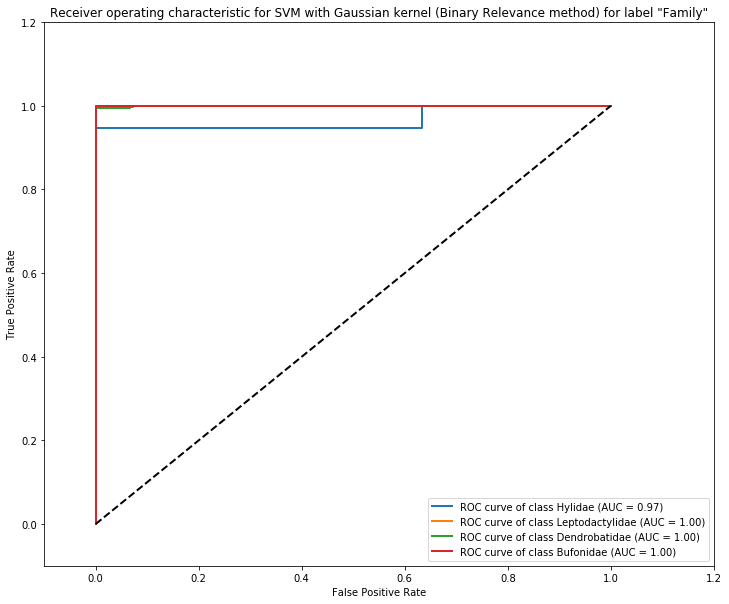

In [508]:
# Question b -> vi (ROC and AUC)

from sklearn.metrics import roc_curve, auc

# We will calculate ROC and AUC for each label separately.

# In this cell, we will calculate ROC and AUC for SVM 
# with Gaussian kernel (Binary Relevance method) for label "Family" 

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Below, I define y_score as it is also defined in the sklearn library!!
y_score_family_1 = classif1.decision_function(features_test)


classes_fam = ["Hylidae", "Leptodactylidae",
               "Dendrobatidae", "Bufonidae"]

# One Hot Encoding of family_test
le.fit(family_test)
helpfun = le.transform(family_test)
family_test_one_hot = np.zeros((helpfun.shape[0],len(classes_fam)))
for i in range(helpfun.shape[0]):
    for j in range(0,len(classes_fam)):
        if helpfun[i]==j:
            family_test_one_hot[i][j]=1

for i in range(len(classes_fam)):
    fpr[i], tpr[i], _ = roc_curve(family_test_one_hot[:, i], y_score_family_1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(len(classes_fam)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes_fam[i], roc_auc[i]))


plt.rcParams["figure.figsize"] = [12,10]
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM with Gaussian kernel (Binary Relevance method) for label "Family"')
plt.legend(loc="lower right")
plt.show()

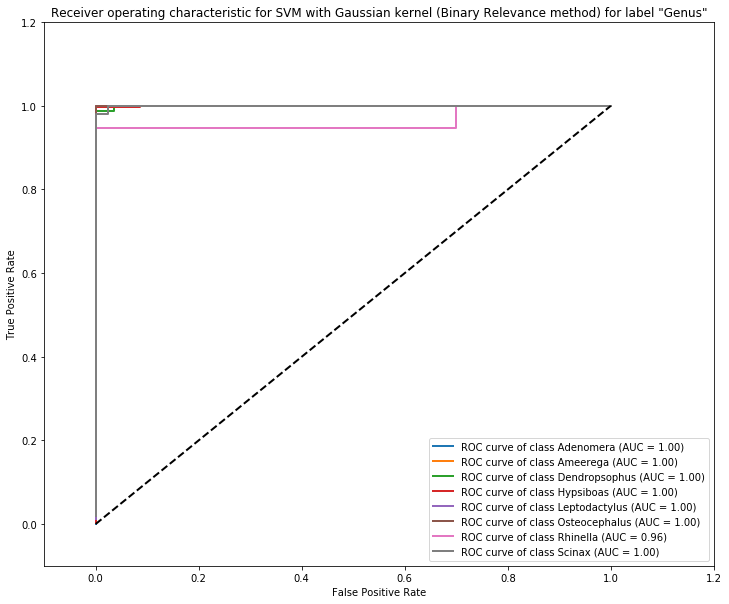

In [507]:
# Question b -> vi (ROC and AUC)

# We will calculate ROC and AUC for each label separately.

# In this cell, we will calculate ROC and AUC for SVM 
# with Gaussian kernel (Binary Relevance method) for label "Genus" 

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Below, I define y_score as it is also defined in the sklearn library!!
y_score_genus_1 = classif2.decision_function(features_test)


classes_gen = ["Adenomera", "Ameerega", "Dendropsophus",
               "Hypsiboas", "Leptodactylus", "Osteocephalus",
               "Rhinella", "Scinax"]

# One Hot Encoding of genus_test
le.fit(genus_test)
helpfun = le.transform(genus_test)
genus_test_one_hot = np.zeros((helpfun.shape[0],len(classes_gen)))
for i in range(helpfun.shape[0]):
    for j in range(0,len(classes_gen)):
        if helpfun[i]==j:
            genus_test_one_hot[i][j]=1

for i in range(len(classes_gen)):
    fpr[i], tpr[i], _ = roc_curve(genus_test_one_hot[:, i], y_score_genus_1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(len(classes_gen)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes_gen[i], roc_auc[i]))


plt.rcParams["figure.figsize"] = [12,10]
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM with Gaussian kernel (Binary Relevance method) for label "Genus"')
plt.legend(loc="lower right")
plt.show()

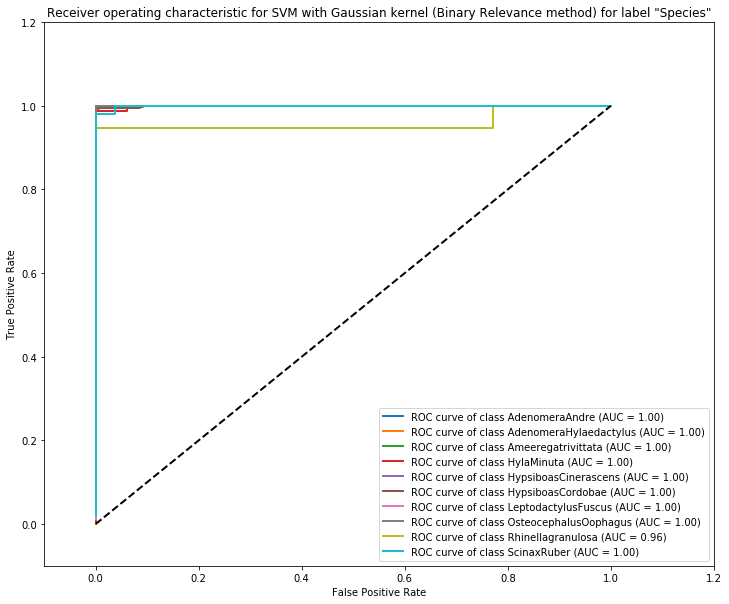

In [506]:
# Question b -> vi (ROC and AUC)

# We will calculate ROC and AUC for each label separately.

# In this cell, we will calculate ROC and AUC for SVM 
# with Gaussian kernel (Binary Relevance method) for label "Species" 

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Below, I define y_score as it is also defined in the sklearn library!!
y_score_species_1 = classif3.decision_function(features_test)


classes_spec = ["AdenomeraAndre", "AdenomeraHylaedactylus", 
                "Ameeregatrivittata", "HylaMinuta",
                "HypsiboasCinerascens", "HypsiboasCordobae",
                "LeptodactylusFuscus", "OsteocephalusOophagus",
                "Rhinellagranulosa", "ScinaxRuber"]

# One Hot Encoding of species_test
le.fit(species_test)
helpfun = le.transform(species_test)
species_test_one_hot = np.zeros((helpfun.shape[0],len(classes_spec)))
for i in range(helpfun.shape[0]):
    for j in range(0,len(classes_spec)):
        if helpfun[i]==j:
            species_test_one_hot[i][j]=1

for i in range(len(classes_spec)):
    fpr[i], tpr[i], _ = roc_curve(species_test_one_hot[:, i], y_score_species_1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(len(classes_spec)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes_spec[i], roc_auc[i]))


plt.rcParams["figure.figsize"] = [12,10]
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM with Gaussian kernel (Binary Relevance method) for label "Species"')
plt.legend(loc="lower right")
plt.show()

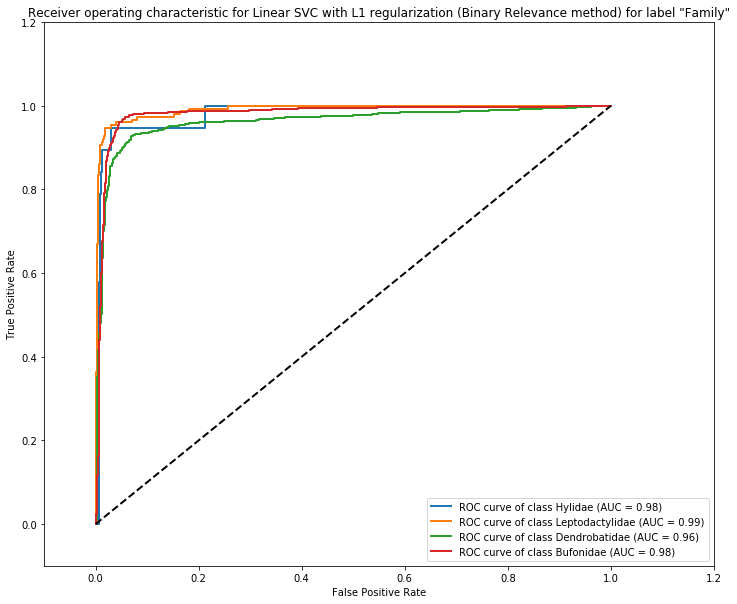

In [505]:
# Question b -> vi (ROC and AUC)

# We will calculate ROC and AUC for each label separately.

# In this cell, we will calculate ROC and AUC for Linear SVC 
# with L1 regularization (Binary Relevance method) for label "Family" 

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Below, I define y_score as it is also defined in the sklearn library!!
y_score_family_2 = classif4.decision_function(features_test)


for i in range(len(classes_fam)):
    fpr[i], tpr[i], _ = roc_curve(family_test_one_hot[:, i], y_score_family_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(len(classes_fam)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes_fam[i], roc_auc[i]))


plt.rcParams["figure.figsize"] = [12,10]
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Linear SVC with L1 regularization (Binary Relevance method) for label "Family"')
plt.legend(loc="lower right")
plt.show()

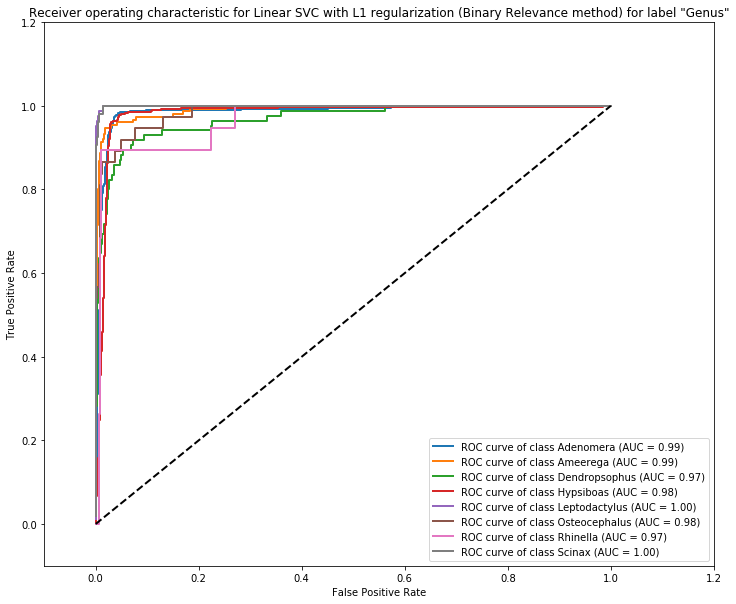

In [504]:
# Question b -> vi (ROC and AUC)

# We will calculate ROC and AUC for each label separately.

# In this cell, we will calculate ROC and AUC for Linear SVC 
# with L1 regularization (Binary Relevance method) for label "Genus" 

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Below, I define y_score as it is also defined in the sklearn library!!
y_score_genus_2 = classif5.decision_function(features_test)


for i in range(len(classes_gen)):
    fpr[i], tpr[i], _ = roc_curve(genus_test_one_hot[:, i], y_score_genus_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(len(classes_gen)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes_gen[i], roc_auc[i]))


plt.rcParams["figure.figsize"] = [12,10]
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Linear SVC with L1 regularization (Binary Relevance method) for label "Genus"')
plt.legend(loc="lower right")
plt.show()

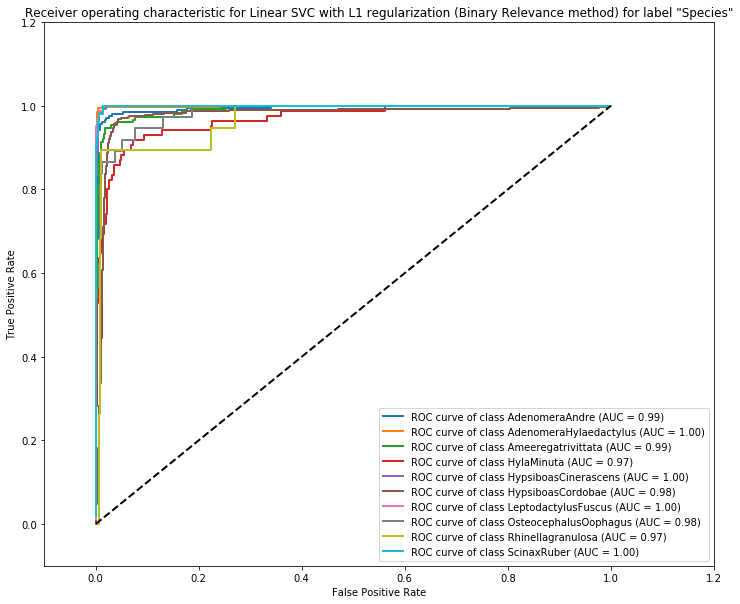

In [503]:
# Question b -> vi (ROC and AUC)

# We will calculate ROC and AUC for each label separately.

# In this cell, we will calculate ROC and AUC for Linear SVC 
# with L1 regularization (Binary Relevance method) for label "Species" 

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Below, I define y_score as it is also defined in the sklearn library!!
y_score_species_2 = classif6.decision_function(features_test)


for i in range(len(classes_spec)):
    fpr[i], tpr[i], _ = roc_curve(species_test_one_hot[:, i], y_score_species_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(len(classes_spec)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes_spec[i], roc_auc[i]))


plt.rcParams["figure.figsize"] = [12,10]
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Linear SVC with L1 regularization (Binary Relevance method) for label "Species"')
plt.legend(loc="lower right")
plt.show()

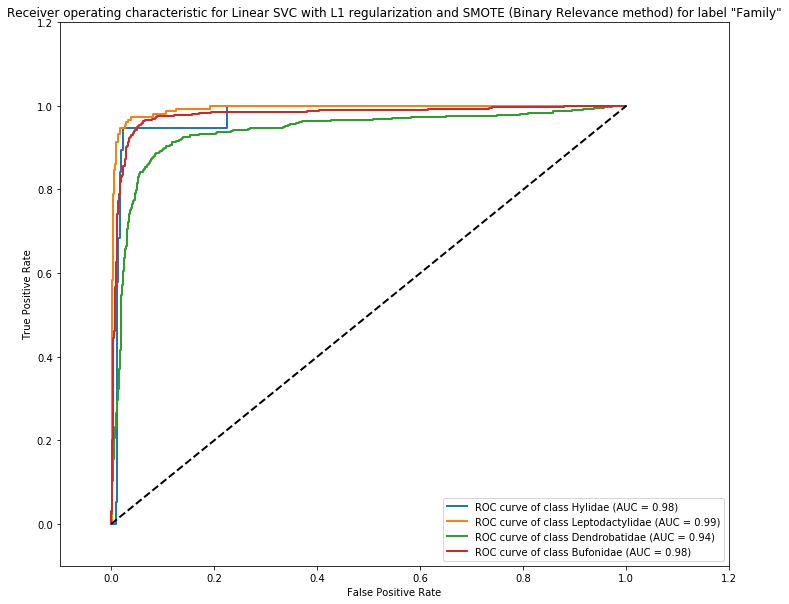

In [502]:
# Question b -> vi (ROC and AUC)

# We will calculate ROC and AUC for each label separately.

# In this cell, we will calculate ROC and AUC for Linear SVC 
# with L1 regularization and SMOTE (Binary Relevance method) for label "Family" 

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Below, I define y_score as it is also defined in the sklearn library!!
y_score_family_3 = classif7.decision_function(features_test)


for i in range(len(classes_fam)):
    fpr[i], tpr[i], _ = roc_curve(family_test_one_hot[:, i], y_score_family_3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(len(classes_fam)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes_fam[i], roc_auc[i]))


plt.rcParams["figure.figsize"] = [12,10]
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Linear SVC with L1 regularization and SMOTE (Binary Relevance method) for label "Family"')
plt.legend(loc="lower right")
plt.show()

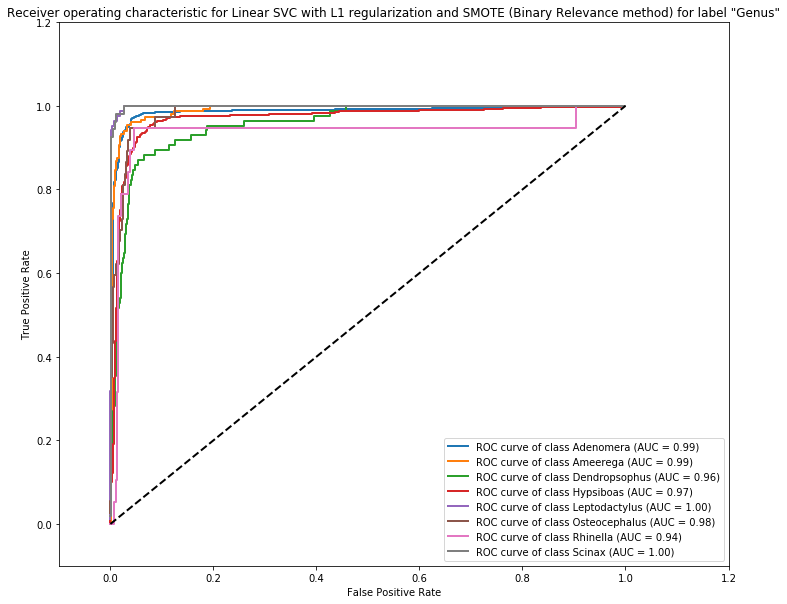

In [501]:
# Question b -> vi (ROC and AUC)

# We will calculate ROC and AUC for each label separately.

# In this cell, we will calculate ROC and AUC for Linear SVC 
# with L1 regularization and SMOTE (Binary Relevance method) for label "Genus" 

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Below, I define y_score as it is also defined in the sklearn library!!
y_score_genus_3 = classif8.decision_function(features_test)


for i in range(len(classes_gen)):
    fpr[i], tpr[i], _ = roc_curve(genus_test_one_hot[:, i], y_score_genus_3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(len(classes_gen)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes_gen[i], roc_auc[i]))


plt.rcParams["figure.figsize"] = [12,10]
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Linear SVC with L1 regularization and SMOTE (Binary Relevance method) for label "Genus"')
plt.legend(loc="lower right")
plt.show()

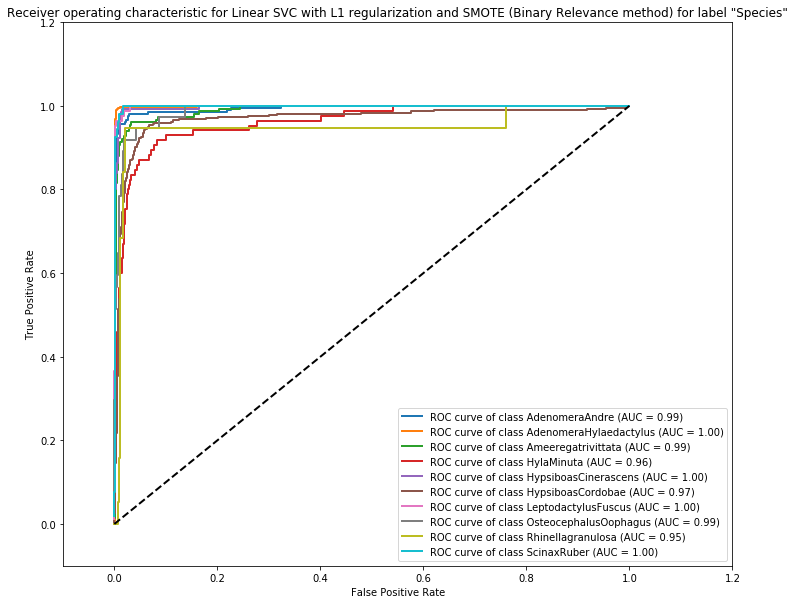

In [500]:
# Question b -> vi (ROC and AUC)

# We will calculate ROC and AUC for each label separately.

# In this cell, we will calculate ROC and AUC for Linear SVC 
# with L1 regularization and SMOTE (Binary Relevance method) for label "Species" 

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Below, I define y_score as it is also defined in the sklearn library!!
y_score_species_3 = classif9.decision_function(features_test)


for i in range(len(classes_spec)):
    fpr[i], tpr[i], _ = roc_curve(species_test_one_hot[:, i], y_score_species_3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(len(classes_spec)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes_spec[i], roc_auc[i]))


plt.rcParams["figure.figsize"] = [12,10]
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Linear SVC with L1 regularization and SMOTE (Binary Relevance method) for label "Species"')
plt.legend(loc="lower right")
plt.show()

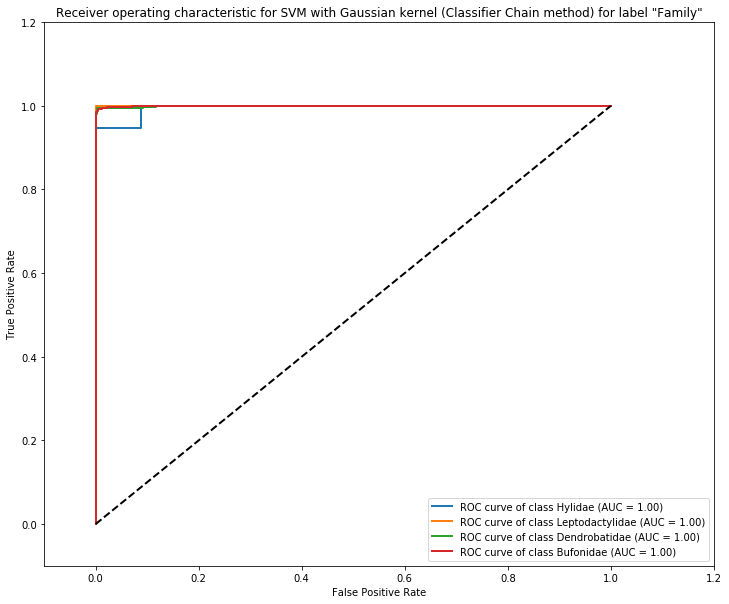

In [509]:
# Question b -> vi (ROC and AUC)

# We will calculate ROC and AUC for each label separately.

# In this cell, we will calculate ROC and AUC for SVM 
# with Gaussian kernel (Classifier Chain method) for label "Family" 

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Below, I define y_score as it is also defined in the sklearn library!!
y_score_family_4 = classif10.decision_function(features_test)


for i in range(len(classes_fam)):
    fpr[i], tpr[i], _ = roc_curve(family_test_one_hot[:, i], y_score_family_4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(len(classes_fam)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes_fam[i], roc_auc[i]))


plt.rcParams["figure.figsize"] = [12,10]
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM with Gaussian kernel (Classifier Chain method) for label "Family"')
plt.legend(loc="lower right")
plt.show()

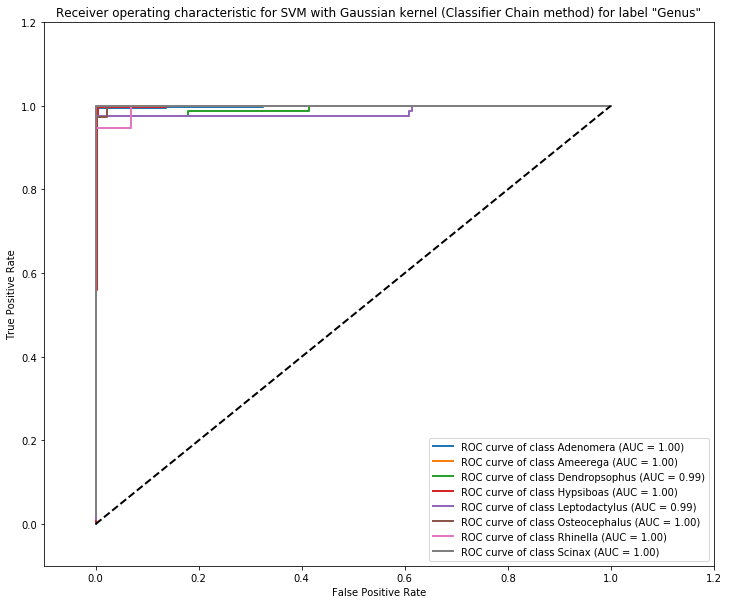

In [511]:
# Question b -> vi (ROC and AUC)

# We will calculate ROC and AUC for each label separately.

# In this cell, we will calculate ROC and AUC for SVM 
# with Gaussian kernel (Classifier Chain method) for label "Genus" 

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Below, I define y_score as it is also defined in the sklearn library!!
y_score_genus_4 = classif11.decision_function(features_test_augment_1)


for i in range(len(classes_gen)):
    fpr[i], tpr[i], _ = roc_curve(genus_test_one_hot[:, i], y_score_genus_4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(len(classes_gen)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes_gen[i], roc_auc[i]))


plt.rcParams["figure.figsize"] = [12,10]
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM with Gaussian kernel (Classifier Chain method) for label "Genus"')
plt.legend(loc="lower right")
plt.show()

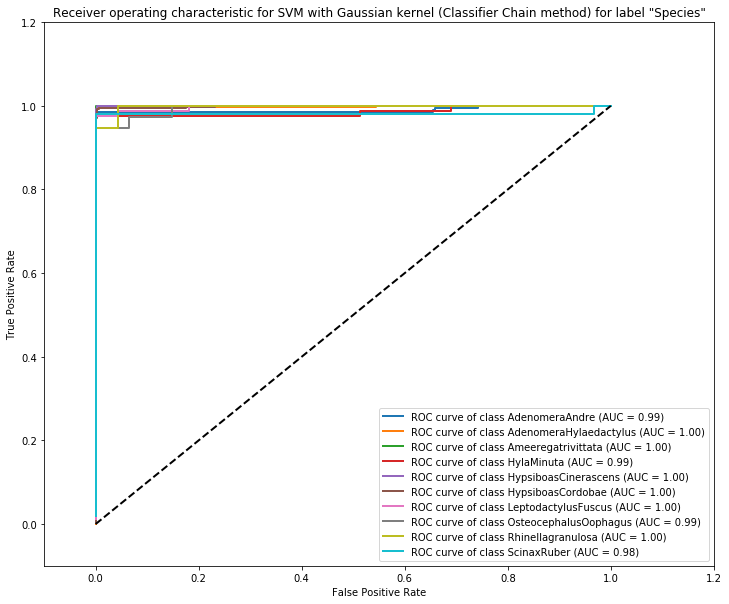

In [512]:
# Question b -> vi (ROC and AUC)

# We will calculate ROC and AUC for each label separately.

# In this cell, we will calculate ROC and AUC for SVM 
# with Gaussian kernel (Classifier Chain method) for label "Species" 

# Compute ROC curve and AUC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Below, I define y_score as it is also defined in the sklearn library!!
y_score_species_4 = classif12.decision_function(features_test_augment_2)


for i in range(len(classes_spec)):
    fpr[i], tpr[i], _ = roc_curve(species_test_one_hot[:, i], y_score_species_4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(len(classes_spec)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(classes_spec[i], roc_auc[i]))


plt.rcParams["figure.figsize"] = [12,10]
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM with Gaussian kernel (Classifier Chain method) for label "Species"')
plt.legend(loc="lower right")
plt.show()